In [1]:
#! /usr/bin/env python3

import pandas as pd
import os
import sys

In [37]:
problem='mdvrbsp_MINMAX_RANDOM'
indexes = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]

In [39]:
def read_dfs(U):
    path = '../vns/results/'+problem+'/U_' + str(U)
    f = [path + '/' + k for k in os.listdir(path) if "objective_improvements" in k]
    dfs = [pd.read_csv(planilha, sep=" ", header=None, names=['CurrTime', 'ObjValue']) for planilha in f]
    
    return dfs

### Heuristic Constructive Data

In [40]:
arr = []
for u in indexes:
    dfs = read_dfs(u)
    ch_arr = [[df["ObjValue"][0], df['CurrTime'][0]] for df in dfs]
    # ch_arr = [dfs[0]["ObjValue"][0], dfs[0]['CurrTime'][0]]
    ch_df = pd.DataFrame(data=ch_arr, columns=['ObjValue','Time'])
    # arr.append(str(ch_df['ObjValue'].mean()).replace('.', ','))
    arr.append(str("{:.3f}".format(ch_df.mean()[0])).replace('.', ','))

print(*arr)

1,767 2,600 4,567 7,367 13,133 24,100 45,467 87,033 170,867


### VNS Objectives

In [41]:
arr = []
for u in indexes:
    dfs = read_dfs(u)
    ch_arr = [df["ObjValue"].iloc[-1] for df in dfs]
    ch_df = pd.DataFrame(data=ch_arr, columns=['ObjValue'])
    # print(ch_df['ObjValue'].mean())
    arr.append(str(ch_df['ObjValue'].mean()).replace('.', ','))
    
print(*arr)

1,4333333333333333 2,3666666666666667 4,366666666666666 7,366666666666666 13,133333333333333 24,1 45,46666666666667 87,03333333333333 170,86666666666667


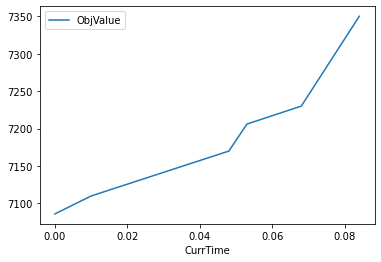

In [6]:
import matplotlib.pyplot as plt
dfs[0].plot(x=0,y=1)
plt.show()

In [7]:
dfs[0]

,CurrTime,ObjValue
0,0.000,7085.9
1,0.010,7109.9
2,0.048,7169.9
3,0.053,7206.0
4,0.068,7230.0
5,0.084,7350.1


In [53]:
def read_iter(U):
    path = '../vns/results/'+problem+'/U_' + str(U)
    f = [path + '/' + k for k in os.listdir(path) if "iterations" in k]
    dfs = [pd.read_csv(planilha, sep=" ", header=None, names=['local', 'global']) for planilha in f]
    dfs = [u for u in dfs if u.empty == False]
    
    return dfs


# arr = []
# for u in indexes:
#     dfs = read_dfs(u)
#     ch_arr = [df["ObjValue"].iloc[-1] for df in dfs]
#     ch_df = pd.DataFrame(data=ch_arr, columns=['ObjValue'])
#     # print(ch_df['ObjValue'].mean())
#     arr.append(str(ch_df['ObjValue'].mean()).replace('.', ','))
    
# print(*arr)

for u in indexes:
    seila = read_iter(u)
    seila_arr = [df['local'].iloc[0] for df in seila]
    ch_df = pd.DataFrame(data=seila_arr, columns=['loops'])
    print(ch_df['loops'].mean())


35255.52380952381
44951.96666666667
22623.3
13802.5
6873.033333333334
3290.4
1430.4666666666667
557.2666666666667
179.33333333333334
